In [13]:
from objetos import *
from function import *
import pandas as pd 
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [14]:
list_comp,attributos_=readFile(excel_file='Teste.xlsx')

Component created named motor
Component created named fan
Component created named heater
Component created named nozzle
Component created named body
Atribute named geometry linked to motor
Atribute named material linked to motor
Atribute named power linked to motor
Atribute named temperature linked to motor
Atribute named geometry linked to fan
Atribute named rot.speed linked to fan
Atribute named material linked to fan
Atribute named power linked to fan
Atribute named geometry linked to heater
Atribute named material linked to heater
Atribute named power linked to heater
Atribute named temperature linked to heater
Atribute named geometry linked to nozzle
Atribute named material linked to nozzle
Atribute named temperature linked to nozzle
Atribute named geometry linked to body
Atribute named material linked to body


## NOTE: in this part we are supposed to add link. Don't know how to do it yet. 

In [15]:
links=createMatrix(attributes_list=attributos_)
links.shape

(17, 17, 2)

In [16]:
createLink(matrix=links,attribute1=attributos_[0], attribute2=attributos_[1],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[2], attribute2=attributos_[3],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[4], attribute2=attributos_[5],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[6], attribute2=attributos_[7],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[8], attribute2=attributos_[9],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[10], attribute2=attributos_[11],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[12], attribute2=attributos_[13],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[14], attribute2=attributos_[15],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[16], attribute2=attributos_[1],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[0], attribute2=attributos_[15],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[1], attribute2=attributos_[12],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[1], attribute2=attributos_[4],attribute_list=attributos_, time=2, risk=100 )
links

array([[[  0,   0],
        [ 50,   1],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 50,   1],
        [  0,   0]],

       [[ 50,   1],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2]],

       [[  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   

## Creating Stop Conditions


In [17]:
Mov=Behaviour(name="Movement")
Mov.addCondition(attributos_[1])
Mov.addCondition(attributos_[2])
Mov.addCondition(attributos_[0])

Inf_Iteraction= Behaviour(name="teste")
behavi=[Mov,Inf_Iteraction]

Behaviour created named Movement
Created a condtion that material has to work for  Movement to continue working
Created a condtion that power has to work for  Movement to continue working
Created a condtion that geometry has to work for  Movement to continue working
Behaviour created named teste


In [18]:
# State_machine(components=list_comp,behaviour=behavi,link_matrix=links,attrs= attributos_,number_of_interaction=5)

In [19]:
df= analysis(path='Simulations/Simulation_5_12_2023_16_27/Analysis/')

In [20]:
def count_and_list(series):
    unique_values = list(set(series))
    count_dict = {value: series[series == value].count() for value in unique_values}
    return unique_values, count_dict

def countFailureModes_(df=None, **path):
    if df is None:
        # If df is not provided, check if a file path is provided
        if 'path' in path:
            df = analysis(path['path'])
    
    result = df.groupby('Attribute.Component').agg({
        'Tick': 'mean',
        'Origin': count_and_list
    }).reset_index()

    # Extract unique values from 'Origin' dynamically
    unique_origins = set()
    for origin_list, _ in result['Origin']:
        unique_origins.update(origin_list)

    # Creating new columns for Unique Origin and their counts
    for value in unique_origins:
        result[value] = result['Origin'].apply(lambda x: x[1].get(value, 0))

    result = result.drop(columns=['Origin'])
    result.columns = ['Attribute.Component', 'Mean Tick to Fail'] + [f'{value}' for value in result.columns[2:]]
    
    return result

In [21]:
result=countFailureModes_(df=df)
result

,Attribute.Component,Mean Tick to Fail,rot.speed.fan,material.heater,geometry.body,geometry.nozzle,temperature.motor,material.fan,geometry.fan,material.motor,power.fan,temperature.heater,power.motor,material.body,material.nozzle,geometry.motor
0,geometry.body,1.333333,0,0,2,0,0,0,0,0,0,0,0,0,0,1
1,geometry.fan,1.333333,1,0,0,0,0,0,2,0,0,0,0,0,0,0
2,geometry.heater,2.500000,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,geometry.motor,2.000000,0,0,2,0,0,0,0,1,0,0,0,0,0,3
4,geometry.nozzle,3.333333,0,0,0,2,0,0,0,0,0,0,0,0,1,0
5,material.body,2.800000,0,0,0,0,0,0,0,0,0,0,0,5,0,0
6,material.fan,0.750000,0,0,0,0,0,3,0,0,1,0,0,0,0,0
7,material.heater,1.000000,0,4,0,0,0,0,0,0,0,0,0,0,0,0
8,material.motor,3.500000,0,0,0,1,0,0,2,2,0,0,0,2,0,3
9,material.nozzle,3.500000,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Right now, think about other analysis:
- Graphos with color code
- Heatmap 



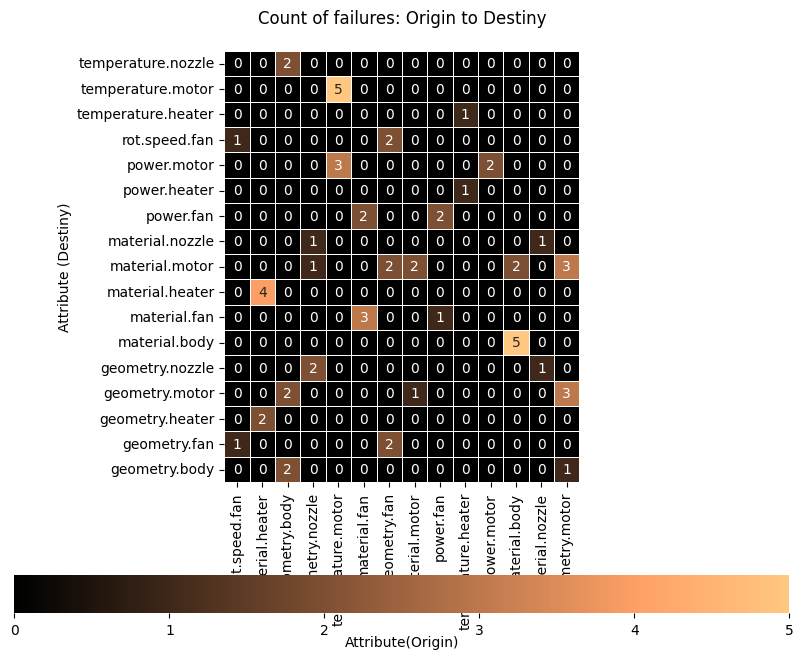

In [22]:
plot_heatmap(count_values=result)